In [640]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
np.random.seed(42)
import random
random.seed(42)

# Fraud Dataset

In [641]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [642]:
df = pd.read_csv("creditcard.csv")

In [643]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [644]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [645]:
X, y = df.drop("Class",axis=1), df["Class"]

In [689]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# Train-Validation Split

In [646]:
from sklearn.model_selection import train_test_split

In [647]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [731]:
global X_train, X_test, y_train, y_test
for fold, (train_index, test_index) in enumerate(kfold.split(X,y)):
    if fold==4:
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [732]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train, random_state=42)

# ML Libraries

In [717]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [718]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc

# Model 1: Decision Tree

In [733]:
# for i in range(1, len(X.columns)+1):
#     model = DecisionTreeClassifier(max_depth=i)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_val)
#     accuracy = accuracy_score(y_val, y_pred)
#     print(f"Accuracy: {accuracy}, Max Depth: {i}")

In [734]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [735]:
y_pred = model.predict(X_test)

In [736]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.9993679886237953
0.8444444444444444
0.7755102040816326
0.8876319991443811


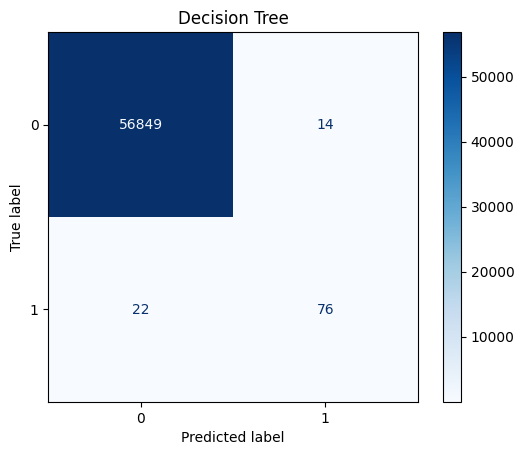

In [737]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree")
plt.show()

y_pred_proba_train = model.predict_proba(X_train)
y_pred_proba_test = model.predict_proba(X_test)

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test[:, 1])
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train[:, 1])

auc_test = auc(fpr_test, tpr_test)
auc_train = auc(fpr_train, tpr_train)

plt.title(f"ROC curve, AUC=(test: {auc_test:.4f}, train: {auc_train:.4f})")
plt.plot(fpr_test, tpr_test, label="test data")
plt.plot(fpr_train, tpr_train, label="train data")
plt.legend()
plt.show()

# Model 2: Random Forest

In [657]:
# for i in range(1, 128):
#     model = RandomForestClassifier(n_estimators=i)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_val)
#     accuracy = accuracy_score(y_val, y_pred)
#     print(f"Accuracy: {accuracy}, # Trees: {i}")

In [658]:
model = RandomForestClassifier(n_estimators=5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [659]:
y_test = model.predict(X_test)

In [660]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9999    0.9995    0.9997     56880
           1     0.7327    0.9136    0.8132        81

    accuracy                         0.9994     56961
   macro avg     0.8663    0.9566    0.9064     56961
weighted avg     0.9995    0.9994    0.9994     56961



In [661]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.9994031003669177
0.7326732673267327
0.9135802469135802
0.9565527816846382


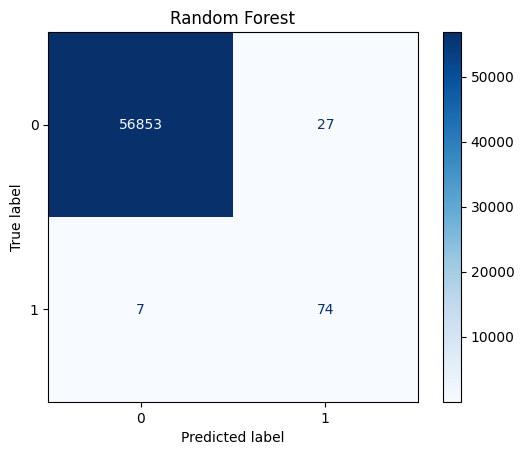

In [662]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest")
plt.show()

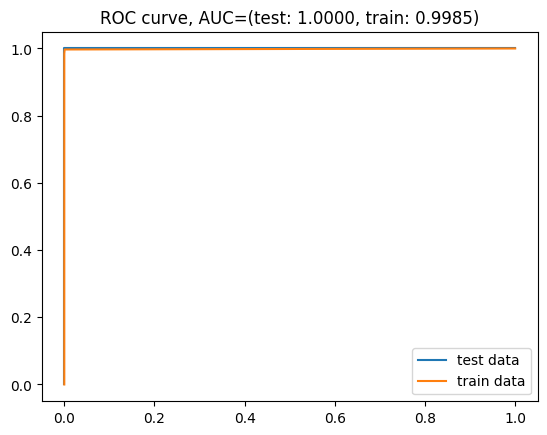

In [663]:
y_pred_proba_train = model.predict_proba(X_train)
y_pred_proba_test = model.predict_proba(X_test)

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test[:, 1])
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train[:, 1])

auc_test = auc(fpr_test, tpr_test)
auc_train = auc(fpr_train, tpr_train)

plt.title(f"ROC curve, AUC=(test: {auc_test:.4f}, train: {auc_train:.4f})")
plt.plot(fpr_test, tpr_test, label="test data")
plt.plot(fpr_train, tpr_train, label="train data")
plt.legend()
plt.show()

# GBDT 1: Constant

In [664]:
import xgboost as xgb

In [665]:
# max_accuracy = 0
# max_trees = 0
# for i in range(1, 500):
#     kmodel = xgb.XGBClassifier(
#         n_estimators=i,
#         learning_rate=0.01,
#         max_depth = 2,
#         eval_metric=["logloss","error"]
#     )
#     kmodel.fit(X_train, y_train)
#     y_pred = kmodel.predict(X_val)
#     accuracy = accuracy_score(y_val, y_pred)
#     if accuracy>max_accuracy: max_accuracy = accuracy; max_trees = i

# print(f"Best # of trees: {max_trees}")

In [666]:
# max_accuracy = 0
# best_lr = 0
# for i in range(1, 100):
#     kmodel = xgb.XGBClassifier(
#         n_estimators=423,
#         learning_rate=i/100,
#         max_depth = 2,
#         eval_metric=["logloss","error"]
#     )
#     kmodel.fit(X_train, y_train)
#     y_pred = kmodel.predict(X_val)
#     accuracy = accuracy_score(y_val, y_pred)
#     if accuracy>max_accuracy: max_accuracy = accuracy; best_lr = i

# print(f"Best learning rate : {best_lr}")

In [667]:
kmodel = xgb.XGBClassifier(
    n_estimators=423,
    learning_rate=0.08,
    # max_depth = 2,
    eval_metric=["logloss","error"]
)

In [668]:
kmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['logloss', 'error'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=423,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [669]:
y_pred = kmodel.predict(X_test)

In [670]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.9997717736697038
0.8863636363636364
0.9629629629629629
0.9813935771214252


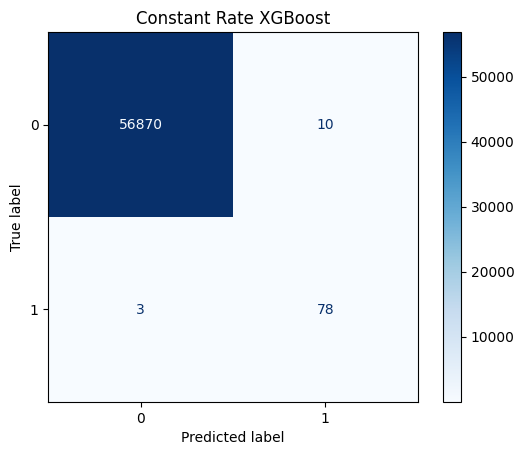

In [671]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Constant Rate XGBoost")
plt.show()

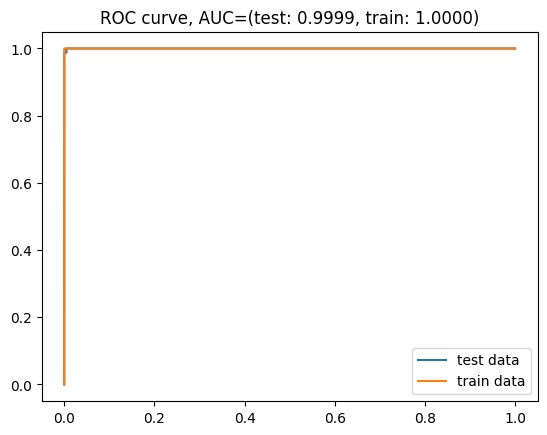

In [672]:
y_pred_proba_train = kmodel.predict_proba(X_train)
y_pred_proba_test = kmodel.predict_proba(X_test)

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test[:, 1])
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train[:, 1])

auc_test = auc(fpr_test, tpr_test)
auc_train = auc(fpr_train, tpr_train)

plt.title(f"ROC curve, AUC=(test: {auc_test:.4f}, train: {auc_train:.4f})")
plt.plot(fpr_test, tpr_test, label="test data")
plt.plot(fpr_train, tpr_train, label="train data")
plt.legend()
plt.show()

# GBDT 2: Exp

In [673]:
class CustomLR(xgb.callback.TrainingCallback):
    def __init__(self, initial_lr=0.1):
        self.initial_lr = initial_lr
        self.grad_hist = []
    
    def after_iteration(self, model, epoch, evals_log):
        new_lr = self.initial_lr*0.9
        model.set_param({"learning_rate":new_lr})

callback = CustomLR(initial_lr=0.1)

In [674]:
xpmodel = xgb.XGBClassifier(
    n_estimators=423,
    learning_rate=0.1,
    # max_depth = 2,
    callbacks=[callback]
)

xpmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None,
              callbacks=[<__main__.CustomLR object at 0x12de125a0>],
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=423, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [675]:
y_pred = xpmodel.predict(X_test)

In [676]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.9997893295412651
0.8876404494382022
0.9753086419753086
0.987566416627598


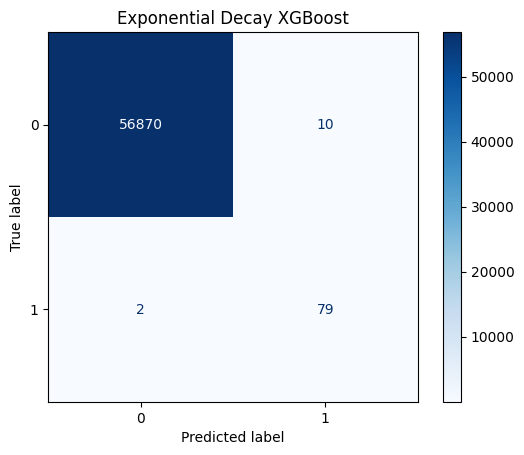

In [677]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Exponential Decay XGBoost")
plt.show()

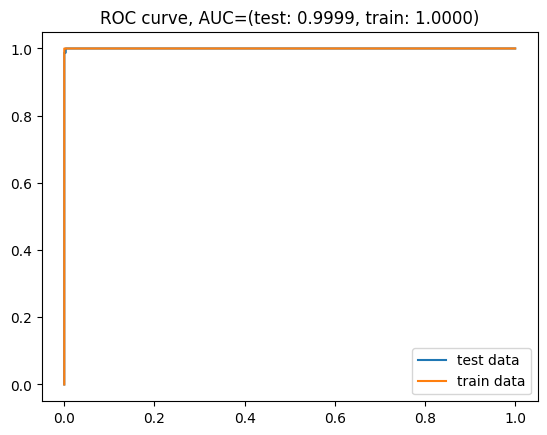

In [678]:
y_pred_proba_train = xpmodel.predict_proba(X_train)
y_pred_proba_test = xpmodel.predict_proba(X_test)

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test[:, 1])
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train[:, 1])

auc_test = auc(fpr_test, tpr_test)
auc_train = auc(fpr_train, tpr_train)

plt.title(f"ROC curve, AUC=(test: {auc_test:.4f}, train: {auc_train:.4f})")
plt.plot(fpr_test, tpr_test, label="test data")
plt.plot(fpr_train, tpr_train, label="train data")
plt.legend()
plt.show()

# GBDT 3: Momentum

In [679]:
class Momentum(xgb.callback.TrainingCallback):
    def __init__(self, initial_lr):
        self.initial_lr = initial_lr
        self.velocity = 0
    
    def after_iteration(self, model, epoch, evals_log):
        losses = evals_log['validation_1']['logloss']
        if len(losses)<2: model.set_param({"learning_rate":self.initial_lr}); return
        delF = losses[-1]-losses[-2]
        self.velocity = 0.99*self.velocity + (1-0.99)*delF
        new_lr = self.initial_lr*(1+self.velocity)
        model.set_param({"learning_rate":new_lr})

callback = Momentum(initial_lr=0.89)

In [680]:
# max_accuracy = 0
# best_i = 0

# for i in range(1, 100):
#     class Momentum(xgb.callback.TrainingCallback):
#         def __init__(self, initial_lr):
#             self.initial_lr = initial_lr
#             self.velocity = 0
        
#         def after_iteration(self, model, epoch, evals_log):
#             losses = evals_log['validation_1']['logloss']
#             if len(losses)<2: model.set_param({"learning_rate":0.89}); return
#             delF = losses[-1]-losses[-2]
#             self.velocity = (i/100)*self.velocity + (1-i/100)*delF
#             new_lr = self.initial_lr*(1+self.velocity)
#             model.set_param({"learning_rate":new_lr})

#     callback = Momentum(initial_lr=0.89)
#     maxgboost = xgb.XGBClassifier(
#         n_estimators=423,
#         learning_rate=0.89,
#         max_depth = 2,
#         callbacks=[callback],
#         eval_metric=["logloss","error"]
#     )
#     maxgboost.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])
#     y_pred = maxgboost.predict(X_val)
#     accuracy = accuracy_score(y_val, y_pred)
#     if accuracy>max_accuracy: max_accuracy = accuracy; best_i  = i

# print(best_i)

In [681]:
# max_accuracy = 0
# best_lr = 0
# for i in range(1, 100):
#     callback = Momentum(initial_lr=i/100)
#     maxgboost = xgb.XGBClassifier(
#         n_estimators=423,
#         learning_rate=i/100,
#         max_depth = 2,
#         callbacks=[callback],
#         eval_metric=["logloss","error"]
#     )
#     maxgboost.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])
#     y_pred = maxgboost.predict(X_val)
#     accuracy = accuracy_score(y_val, y_pred)
#     if accuracy>max_accuracy: max_accuracy = accuracy; best_lr = i

# print(f"Best learning rate: {best_lr}")

In [682]:
maxgboost = xgb.XGBClassifier(
    n_estimators=423,
    learning_rate=0.89,
    # max_depth = 2,
    callbacks=[callback],
    eval_metric=["logloss","error"]
)

maxgboost.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])

[0]	validation_0-logloss:0.04994	validation_0-error:0.00049	validation_1-logloss:0.04987	validation_1-error:0.00047
[1]	validation_0-logloss:0.02133	validation_0-error:0.00059	validation_1-logloss:0.02155	validation_1-error:0.00076
[2]	validation_0-logloss:0.00952	validation_0-error:0.00035	validation_1-logloss:0.00978	validation_1-error:0.00050
[3]	validation_0-logloss:0.00476	validation_0-error:0.00033	validation_1-logloss:0.00526	validation_1-error:0.00056
[4]	validation_0-logloss:0.00279	validation_0-error:0.00032	validation_1-logloss:0.00335	validation_1-error:0.00044
[5]	validation_0-logloss:0.00189	validation_0-error:0.00026	validation_1-logloss:0.00260	validation_1-error:0.00044
[6]	validation_0-logloss:0.00143	validation_0-error:0.00024	validation_1-logloss:0.00246	validation_1-error:0.00053
[7]	validation_0-logloss:0.00109	validation_0-error:0.00021	validation_1-logloss:0.00239	validation_1-error:0.00047
[8]	validation_0-logloss:0.00086	validation_0-error:0.00017	validation_1

XGBClassifier(base_score=None, booster=None,
              callbacks=[<__main__.Momentum object at 0x14b1a7920>],
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['logloss', 'error'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.89, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=423,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [683]:
y_pred = maxgboost.predict(X_test)

In [684]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.9996839943118976
0.8620689655172413
0.9259259259259259
0.9628574777308955


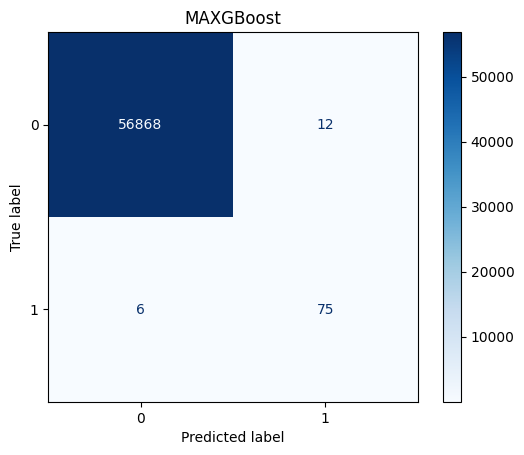

In [685]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("MAXGBoost")
plt.show()

In [686]:
results = maxgboost.evals_result()
print(results)

{'validation_0': OrderedDict({'logloss': [0.0499357860923264, 0.02133149311597324, 0.00951576889323738, 0.00476416658786195, 0.00278832713352392, 0.00188924543076882, 0.00143172062369804, 0.00108737268504741, 0.00085890402601574, 0.00066838042129059, 0.0005407324567311, 0.00042931364888932, 0.00032424408224628, 0.00025227020619506, 0.00020931583107996, 0.00017704497890809, 0.00015349406522874, 0.00013874116234778, 0.00012276187791903, 0.00010956638453789, 9.840710615055e-05, 9.120555911557e-05, 8.495802564829e-05, 7.931362556885e-05, 7.486275516744e-05, 7.174355105047e-05, 6.791844742622e-05, 6.461580399751e-05, 6.119598734317e-05, 5.874844573313e-05, 5.655708615731e-05, 5.464495918192e-05, 5.30449686305e-05, 5.11907597341e-05, 4.968700350727e-05, 4.776586791045e-05, 4.63051370411e-05, 4.493304864381e-05, 4.368069563261e-05, 4.262745782858e-05, 4.187264850206e-05, 4.091686941652e-05, 4.00859993186e-05, 3.945928222729e-05, 3.874955226669e-05, 3.792935878443e-05, 3.735880991762e-05, 3.67

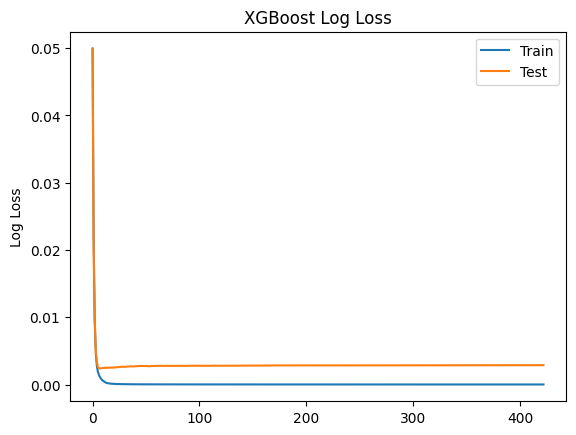

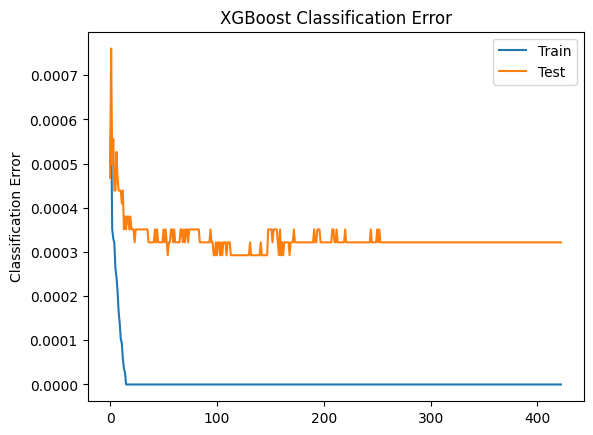

In [687]:

# retrieve performance metrics
results = maxgboost.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

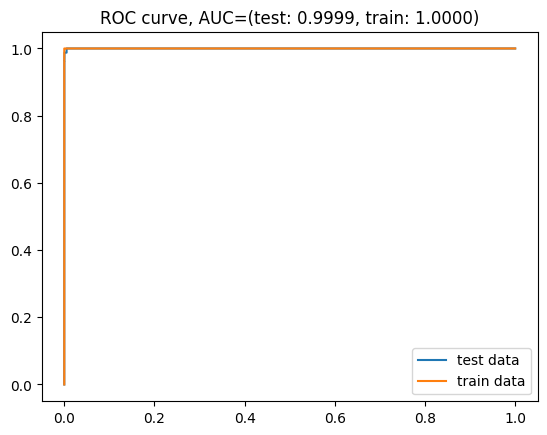

In [688]:
y_pred_proba_train = maxgboost.predict_proba(X_train)
y_pred_proba_test = maxgboost.predict_proba(X_test)

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test[:, 1])
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train[:, 1])

auc_test = auc(fpr_test, tpr_test)
auc_train = auc(fpr_train, tpr_train)

plt.title(f"ROC curve, AUC=(test: {auc_test:.4f}, train: {auc_train:.4f})")
plt.plot(fpr_test, tpr_test, label="test data")
plt.plot(fpr_train, tpr_train, label="train data")
plt.legend()
plt.show()